### Packages

In [1]:
import pandas as pd
import seaborn as sns
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)


True

In [4]:
#cleaning the text
#cleaning text is basically removing stop words, commas, full stops, lemmatizing or stemming it etc.
import re #for regular expression
from nltk.corpus import stopwords #responsible for removing stopwords
#from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer #responsible for doing lemmatizing

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer #responsible to do the tf-idf mechanism

In [6]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
#from imblearn.over_sampling import RandomOverSampler

In [8]:
from imblearn.over_sampling import SMOTE

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [10]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Dataset Preprocessing

In [11]:
data = pd.read_csv('updated_inkognito_trainingset.csv')

In [12]:
df = data.iloc[:1500, :]

In [13]:
df.head()

,Unnamed: 0,text,Status
0,0,@115712 I understand. I would like to assist y...,False
1,1,@sprintcare and how do you propose we do that,False
2,2,@sprintcare I have sent several private messag...,False
3,3,@115712 Please send us a Private Message so th...,False
4,4,@sprintcare I did.,False


In [14]:
df.shape

(1500, 3)

In [15]:
df.columns

Index(['Unnamed: 0', 'text', 'Status'], dtype='object')

In [16]:
df.drop('Unnamed: 0',axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
df.head()

,text,Status
0,@115712 I understand. I would like to assist y...,False
1,@sprintcare and how do you propose we do that,False
2,@sprintcare I have sent several private messag...,False
3,@115712 Please send us a Private Message so th...,False
4,@sprintcare I did.,False


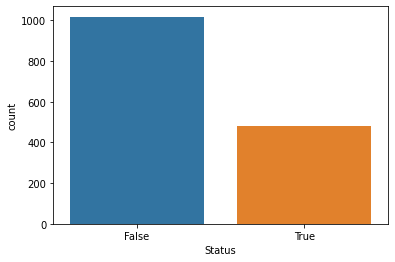

In [18]:
sns.countplot(x=df['Status'])

* We have to do the class imbalance part before doing the classification

In [19]:
df = pd.get_dummies(df, columns=['Status']) #to convert the categorical variable to numerical

In [20]:
df.head()

,text,Status_False,Status_True
0,@115712 I understand. I would like to assist y...,1,0
1,@sprintcare and how do you propose we do that,1,0
2,@sprintcare I have sent several private messag...,1,0
3,@115712 Please send us a Private Message so th...,1,0
4,@sprintcare I did.,1,0


In [21]:
df.drop('Status_False',axis=1,inplace=True)

In [22]:
df = df.rename(columns={'Status_True': 'Status'})

In [23]:
df.head()
# False -> 0
# True -> 1

,text,Status
0,@115712 I understand. I would like to assist y...,0
1,@sprintcare and how do you propose we do that,0
2,@sprintcare I have sent several private messag...,0
3,@115712 Please send us a Private Message so th...,0
4,@sprintcare I did.,0


### Data Cleaning for NLP approach

In [24]:
wordnet = WordNetLemmatizer() #this is responsible for doing the lemmatizing functionality
corpus = [] #after cleaning the text we are going to store perticular sentence in this list

In [25]:
for i in range(0,len(df)): #go through each row in dataset
    review = re.sub('[^a-zA-Z]',' ',df['text'][i]) #apart from a-z and A-Z we remove everything and replace them by spaces
    review = review.lower() #lower all the words then we don't have any duplicates
    review = review.split() #split each and every word to help to lemmatizing
    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')] #lemmatzing and remove stop words
    #first find the word is stop word or not. if it is not a lemmatizing word , then move it to the- lemmatizing purpose.
    #from lemmatizing we can get base form of the word
    review = ' '.join(review) #join every lemmatized word
    corpus.append(review) #append to empty list


In [26]:
len(corpus) #lemmatized sentences

1500

### Building Bag of Words Vectors

In [27]:
cv = TfidfVectorizer() #create an object for bag of words vectors
X_tfidf = cv.fit_transform(corpus).toarray() #convert input data to an array

In [28]:
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
X_tfidf.shape
#there are 2589 words that are taken after lemmatizing
#there are 1000 senetences

(1500, 3357)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['Status'].values, test_size=1/3)

In [31]:
X_train.shape, y_train.shape

((1000, 3357), (1000,))

In [32]:
X_test.shape, y_test.shape

((500, 3357), (500,))

#### Handle the class imbalance using SMOTE
* Handling training set

In [33]:
Counter(y_train) #y_train class counts

Counter({0: 665, 1: 335})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


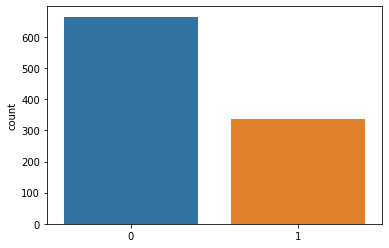

In [34]:
#class distribution of before handling the class imbalancing for training data
sns.countplot(y_train) 

In [35]:
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [36]:
X_train_sm.shape #3357 lemmatized words
# 1376 senetences

(1330, 3357)

In [37]:
Counter(y_train_sm)
#each class have 688

Counter({0: 665, 1: 665})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


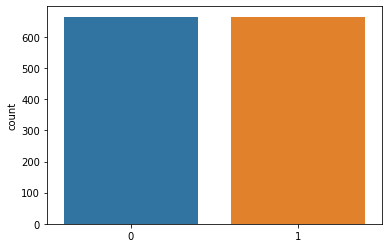

In [38]:
sns.countplot(y_train_sm) #class distribution after handling the imbalanced data for training data

In [39]:
#shape of the training data after handling the class imbalance
X_train_sm.shape, y_train_sm.shape

((1330, 3357), (1330,))

* Handle the testing data

In [40]:
Counter(y_test) #y_test class counts

Counter({0: 353, 1: 147})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


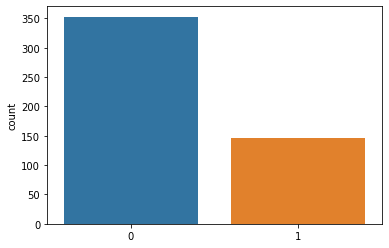

In [41]:
#class distribution of before handling the class imbalancing for training data
sns.countplot(y_test) 

In [42]:
smote = SMOTE()
X_test_sm, y_test_sm = smote.fit_resample(X_test, y_test)

In [43]:
X_test_sm.shape #3357 lemmatized words
# 660 senetences

(706, 3357)

In [44]:
Counter(y_test_sm)
# each class have 330

Counter({0: 353, 1: 353})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


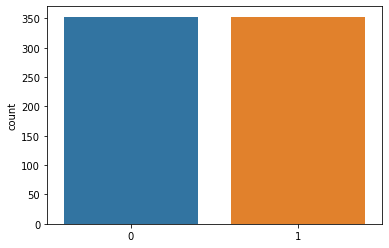

In [45]:
sns.countplot(y_test_sm) #class distribution after handling the imbalanced data for training data

In [46]:
#shape of the training data after handling the class imbalance
X_test_sm.shape, y_test_sm.shape

((706, 3357), (706,))

## Machine Learning Approach

### BOW Model

#### Logistic Regression

In [47]:
tfidf_lr = GridSearchCV(LogisticRegression(),{
    'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
    'max_iter' : [100,150],
    'multi_class' : ['auto','ovr','multinomial']
},cv = 5, return_train_score = False)
tfidf_lr.fit(X_train_sm, y_train_sm)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError(
ValueError: Logisti

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 150],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [48]:
tfidf_lr.best_score_

0.8842105263157893

In [49]:
tfidf_lr.best_params_

{'max_iter': 100, 'multi_class': 'multinomial', 'solver': 'lbfgs'}

* Model Evaluation

In [50]:
#Predicting the test set result
y_pred = tfidf_lr.predict(X_test_sm)
y_pred = (y_pred > 0.5)

In [51]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_sm,y_pred)
cm

array([[321,  32],
       [131, 222]])

Text(33.0, 0.5, 'Truth')

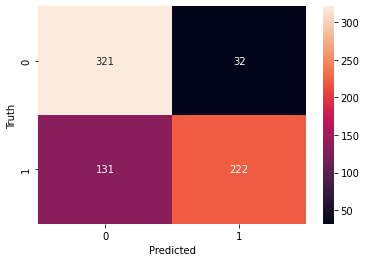

In [52]:
#from matplotlib import pyplot as plt
#import seaborn as sn
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       353
           1       0.87      0.63      0.73       353

    accuracy                           0.77       706
   macro avg       0.79      0.77      0.76       706
weighted avg       0.79      0.77      0.76       706



#### SVM

In [54]:
tfidf_svm = GridSearchCV(svm.SVC(), {
    'C': [1,10,20],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' :[1,10,20],
    'gamma': ['auto','scale']
}, cv=5, return_train_score=False)
tfidf_svm.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20], 'degree': [1, 10, 20],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [55]:
tfidf_svm.best_score_

0.9150375939849624

In [56]:
tfidf_svm.best_params_

{'C': 20, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

* Model Evaluation

In [57]:
#Predicting the test set result
y_pred = tfidf_svm.predict(X_test_sm)
y_pred = (y_pred > 0.5)

In [58]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_sm,y_pred)
cm

array([[337,  16],
       [177, 176]])

Text(33.0, 0.5, 'Truth')

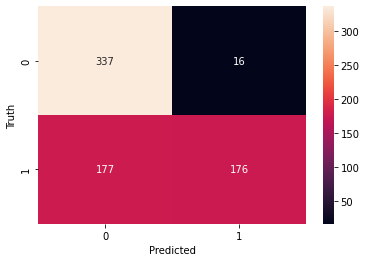

In [59]:
#from matplotlib import pyplot as plt
#import seaborn as sn
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78       353
           1       0.92      0.50      0.65       353

    accuracy                           0.73       706
   macro avg       0.79      0.73      0.71       706
weighted avg       0.79      0.73      0.71       706



KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
tfidf_knn = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': [1,5,10],
    'weights': ['uniform','distance']
}, cv=5, return_train_score=False)

tfidf_knn.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 5, 10],
                         'weights': ['uniform', 'distance']})

In [62]:
tfidf_knn.best_score_

0.9218045112781954

In [63]:
tfidf_knn.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

* Model Evaluation

In [64]:
#Predicting the test set result
y_pred = tfidf_knn.predict(X_test_sm)
y_pred = (y_pred > 0.5)

In [65]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_sm,y_pred)
cm

array([[347,   6],
       [297,  56]])

Text(33.0, 0.5, 'Truth')

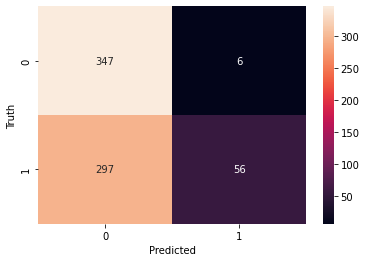

In [66]:
#from matplotlib import pyplot as plt
#import seaborn as sn
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [67]:
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.98      0.70       353
           1       0.90      0.16      0.27       353

    accuracy                           0.57       706
   macro avg       0.72      0.57      0.48       706
weighted avg       0.72      0.57      0.48       706



Naive Bayes

In [68]:
tfidf_nb = GridSearchCV(MultinomialNB(), {
}, cv=5, return_train_score=False)

tfidf_nb.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=MultinomialNB(), param_grid={})

In [69]:
tfidf_nb.best_score_

0.8481203007518797

* Model Evaluation

In [70]:
#Predicting the test set result
y_pred = tfidf_nb.predict(X_test_sm)
y_pred = (y_pred > 0.5)

In [71]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_sm,y_pred)
cm

array([[277,  76],
       [ 61, 292]])

Text(33.0, 0.5, 'Truth')

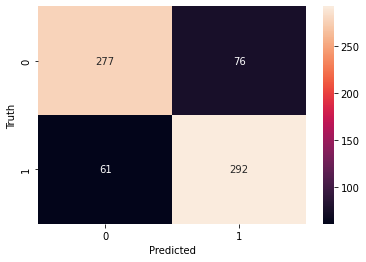

In [72]:
#from matplotlib import pyplot as plt
#import seaborn as sn
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [73]:
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       353
           1       0.79      0.83      0.81       353

    accuracy                           0.81       706
   macro avg       0.81      0.81      0.81       706
weighted avg       0.81      0.81      0.81       706



Decision Tree

In [74]:
tfidf_dt = GridSearchCV(DecisionTreeClassifier(), {
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'max_features' : [[5,10,20],'auto','log2'],
    'random_state' : [5,10]
}, cv=3, return_train_score=False)

tfidf_dt.fit(X_train_sm, y_train_sm)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 291, in fit
    if self.max_features > 0.0:
TypeError: '>' not supported between instances of 'list' and 'float'

  warnings.warn(s

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [[5, 10, 20], 'auto', 'log2'],
                         'random_state': [5, 10],
                         'splitter': ['best', 'random']})

In [75]:
tfidf_dt.best_score_

0.8105549115707129

In [76]:
tfidf_dt.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'random_state': 5,
 'splitter': 'random'}

* Model Evaluation

In [77]:
#Predicting the test set result
y_pred = tfidf_dt.predict(X_test_sm)
y_pred = (y_pred > 0.5)

In [78]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_sm,y_pred)
cm

array([[290,  63],
       [152, 201]])

Text(33.0, 0.5, 'Truth')

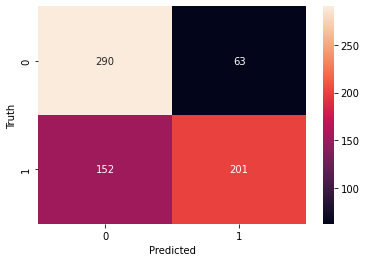

In [79]:
#from matplotlib import pyplot as plt
#import seaborn as sn
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       353
           1       0.76      0.57      0.65       353

    accuracy                           0.70       706
   macro avg       0.71      0.70      0.69       706
weighted avg       0.71      0.70      0.69       706



#### Random Forest

In [81]:
tfidf_rf = GridSearchCV(RandomForestClassifier(), {
    'n_estimators': [1,10,5],
    'criterion': ['gini','entropy'],
    'max_features' : [30,'auto','sqrt','log2'],
    'random_state' : [5,10],
    'ccp_alpha' : [0.05,0.1,0.5],
    'max_samples' : [0.5,10,5,0.1]
}, cv=5, return_train_score=False)

tfidf_rf.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.05, 0.1, 0.5],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [30, 'auto', 'sqrt', 'log2'],
                         'max_samples': [0.5, 10, 5, 0.1],
                         'n_estimators': [1, 10, 5], 'random_state': [5, 10]})

In [82]:
tfidf_rf.best_score_

0.6105263157894736

In [83]:
tfidf_rf.best_params_

{'ccp_alpha': 0.1,
 'criterion': 'entropy',
 'max_features': 'log2',
 'max_samples': 10,
 'n_estimators': 5,
 'random_state': 10}

* Model Evaluation

In [84]:
#Predicting the test set result
y_pred = tfidf_rf.predict(X_test_sm)
y_pred = (y_pred > 0.5)

In [85]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_sm,y_pred)
cm

array([[348,   5],
       [338,  15]])

Text(33.0, 0.5, 'Truth')

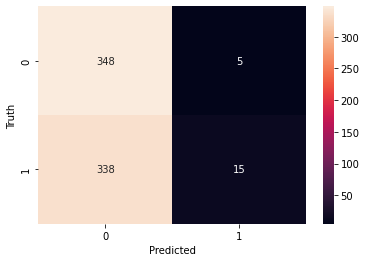

In [86]:
#from matplotlib import pyplot as plt
#import seaborn as sn
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [87]:
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.99      0.67       353
           1       0.75      0.04      0.08       353

    accuracy                           0.51       706
   macro avg       0.63      0.51      0.38       706
weighted avg       0.63      0.51      0.38       706



Gradient Boost Classifier

In [88]:
tfidf_gbc = GridSearchCV(GradientBoostingClassifier(), {
    'loss': ['deviance','exponential'],
    'learning_rate': [1,0.5,1.5],
    'n_estimators' : [100,50,10],
    'subsample' : [1,5,0.5],
    #'criterion' : ['friedman_mse', 'squared_error','absolute_error'],
    'random_state' : [5,10],
    'ccp_alpha' : [0.1,0.5,0.9]
}, cv=5, return_train_score=False)

tfidf_gbc.fit(X_train_sm, y_train_sm)

KeyboardInterrupt: ignored

In [ ]:
tfidf_gbc.best_score_

In [ ]:
tfidf_gbc.best_params_

* Model Evaluation

In [ ]:
#Predicting the test set result
y_pred = tfidf_gbc.predict(X_test_sm)
y_pred = (y_pred > 0.5)

In [ ]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_sm,y_pred)
cm

In [ ]:
#from matplotlib import pyplot as plt
#import seaborn as sn
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test_sm, y_pred))

#### XGBoost Classifier

In [ ]:
tfidf_xgbc = GridSearchCV(XGBClassifier(), {
    'booster': ['gbtree','gblinear'],
    'verbosity': [0,1,2,3],
    'eta' : [0.1,0.5,0.9]
}, cv=5, return_train_score=False)

tfidf_xgbc.fit(X_train_sm,y_train_sm)

In [ ]:
tfidf_xgbc.best_score_

In [ ]:
tfidf_xgbc.best_params_

* Model Evaluation

In [ ]:
#Predicting the test set result
y_pred = tfidf_xgbc.predict(X_test_sm)
y_pred = (y_pred > 0.5)

In [ ]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_sm,y_pred)
cm

In [ ]:
#from matplotlib import pyplot as plt
#import seaborn as sn
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test_sm, y_pred))